In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets-for-exam-score-prediction/train.csv
/kaggle/input/datasets-for-exam-score-prediction/test.csv


In [2]:
import pandas as pd
test_data = pd.read_csv('/kaggle/input/datasets-for-exam-score-prediction/test.csv')
train_data = pd.read_csv('/kaggle/input/datasets-for-exam-score-prediction/train.csv')
print("dataset loaded")

dataset loaded


In [3]:
print("train dataset: ")
print("size: ",train_data.shape)
print("\n first 5 rows:")
print(train_data.head())

train dataset: 
size:  (630000, 13)

 first 5 rows:
   id  age  gender   course  study_hours  class_attendance internet_access  \
0   0   21  female     b.sc         7.91              98.8              no   
1   1   18   other  diploma         4.95              94.8             yes   
2   2   20  female     b.sc         4.68              92.6             yes   
3   3   19    male     b.sc         2.00              49.5             yes   
4   4   23    male      bca         7.65              86.9             yes   

   sleep_hours sleep_quality   study_method facility_rating exam_difficulty  \
0          4.9       average  online videos             low            easy   
1          4.7          poor     self-study          medium        moderate   
2          5.8          poor       coaching            high        moderate   
3          8.3       average    group study            high        moderate   
4          9.6          good     self-study            high            easy   

   e

In [4]:
# description
print(test_data.describe())
print("\n Info:")
print(test_data.info())

                  id            age    study_hours  class_attendance  \
count  270000.000000  270000.000000  270000.000000     270000.000000   
mean   764999.500000      20.544137       4.003878         71.982509   
std     77942.430678       2.260452       2.357741         17.414695   
min    630000.000000      17.000000       0.080000         40.600000   
25%    697499.750000      19.000000       1.980000         57.000000   
50%    764999.500000      21.000000       4.010000         72.600000   
75%    832499.250000      23.000000       6.050000         87.200000   
max    899999.000000      24.000000       7.910000         99.400000   

         sleep_hours  
count  270000.000000  
mean        7.072070  
std         1.745513  
min         4.100000  
25%         5.600000  
50%         7.100000  
75%         8.600000  
max         9.900000  

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 12 columns):
 #   Column            No

In [4]:
# null values and duplicate values in train dataset
print("null values: ")
print(train_data.isnull().sum())
print("\ntotal null values:")
print(train_data.isnull().sum().sum())
print("\nduplicate values: ")
print(train_data.duplicated().sum())

null values: 
id                  0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

total null values:
0

duplicate values: 
0


In [6]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


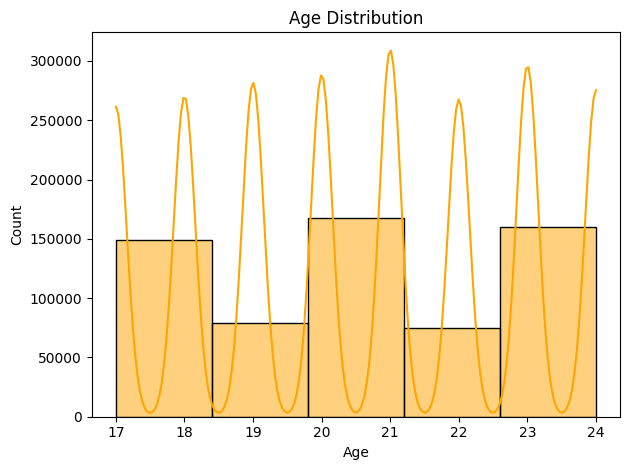

In [7]:
# age distribution
# construct histogram
sns.histplot(train_data['age'], kde=True, color='orange', bins=5)
plt.xlabel('Age')
plt.title("Age Distribution")
plt.tight_layout()
plt.show()

In [10]:
mean_score_less_than_4 = train_data.loc[train_data['study_hours'] <= 4, 'exam_score'].mean()
mean_score_more_than_4 = train_data.loc[train_data['study_hours'] > 4, 'exam_score'].mean()
print("mean exam score who studied less than 4 hours: ",mean_score_less_than_4)
print("mean exam score who studied more than 4 hours: ",mean_score_more_than_4)

mean exam score who studied less than 4 hours:  49.916194445766884
mean exam score who studied more than 4 hours:  75.10314677780424


In [11]:
# students who scored below 35 are considered failed.
failed_students_count = train_data.loc[train_data['exam_score'] < 35, 'id'].count()
total_students = len(train_data)

percent_students_failed = (failed_students_count / total_students) * 100
print(f"Percentage of failed students= {percent_students_failed:.2f} %")

Percentage of failed students= 7.76 %


In [12]:
# which course has the highest failure rate
course_failure_count = train_data.groupby('course')['exam_score'].apply(lambda x: (x < 35).sum())
course_failure_count = course_failure_count.reset_index().sort_values(ascending=False, by='exam_score')
print(course_failure_count)

    course  exam_score
1     b.sc       10135
2   b.tech        9407
0    b.com        7826
5      bca        6731
4      bba        5797
3       ba        4975
6  diploma        4016


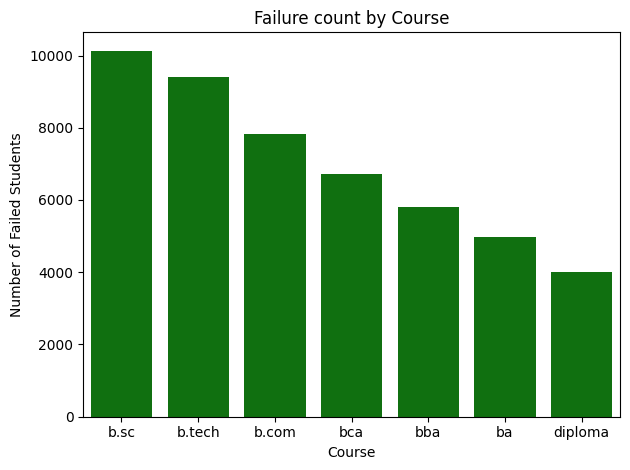

In [13]:
sns.barplot(data=course_failure_count, x='course', y='exam_score', color='green')
plt.xlabel('Course')
plt.ylabel('Number of Failed Students')
plt.title('Failure count by Course')
plt.tight_layout()
plt.show()

In [14]:
has_internet_count = train_data[train_data['internet_access'] == 'yes']['id'].count()
no_internet_count = train_data[train_data['internet_access'] == 'no']['id'].count()
total_students = len(train_data)

percent_has_internet = (has_internet_count / total_students) * 100
percent_no_internet = (no_internet_count / total_students) * 100
print(f"Percentage of students with internet access= {percent_has_internet:.2f} %")
print(f"Percentage of students without internet access= {percent_no_internet:.2f} %")

Percentage of students with internet access= 91.97 %
Percentage of students without internet access= 8.03 %


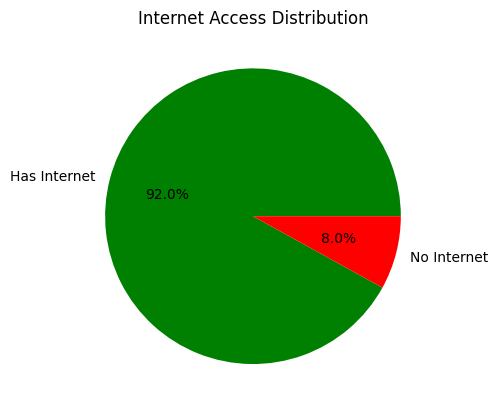

In [15]:
plt.pie([has_internet_count, no_internet_count], labels=['Has Internet', 'No Internet'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Internet Access Distribution')
plt.show()

In [16]:
new_train_data = train_data.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_train_data['encoded_gender'] = le.fit_transform(new_train_data['gender'])
new_train_data['encoded_course'] = le.fit_transform(new_train_data['course'])
new_train_data['encoded_internet'] = le.fit_transform(new_train_data['internet_access'])
new_train_data['encoded_sleepQuality'] = le.fit_transform(new_train_data['sleep_quality'])
new_train_data['encoded_studyMethod'] = le.fit_transform(new_train_data['study_method'])
new_train_data['encoded_facility'] = le.fit_transform(new_train_data['facility_rating'])
new_train_data['encoded_examDifficulty'] = le.fit_transform(new_train_data['exam_difficulty'])

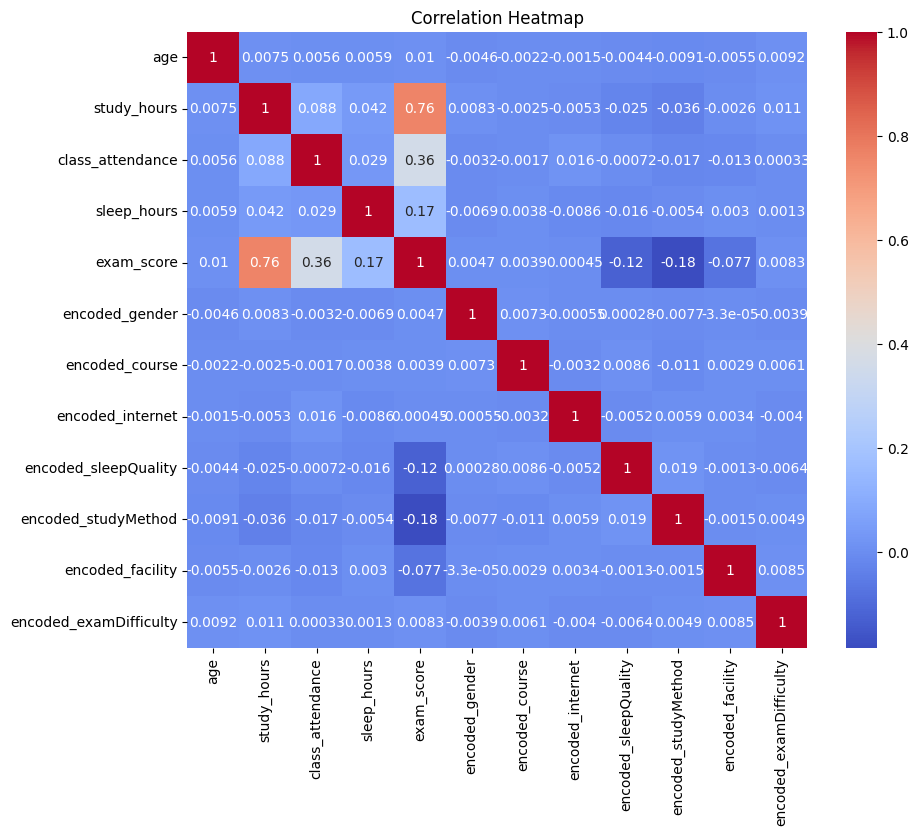

In [17]:
heatmap_train_data = new_train_data.drop(
    ['id', 'gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty'], axis=1)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_train_data.corr(), annot=True, linecolor='white', cmap='coolwarm', cbar=True, )
plt.title('Correlation Heatmap')
plt.show()

In [5]:
# import scikit learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [6]:
# prepare labels and features
x = train_data.drop(['id', 'exam_score'], axis=1)
y = train_data['exam_score']

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(504000, 11)
(126000, 11)
(504000,)
(126000,)


In [7]:
# list of categorical columns
categorical_col = ['gender','course','internet_access','sleep_quality','study_method','facility_rating','exam_difficulty']
# list of numerical columns
numerical_col = ['age','study_hours','class_attendance','sleep_hours']

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, categorical_col),
    ('num', num_transformer, numerical_col)
])

In [8]:
# function to evaluate model
def evaluate_model(model, x_train, y_train, x_test, y_test):
    # fit the model
    model.fit(x_train, y_train)
    # predict the values
    y_pred = modeel.predict(x_test)
    # calculate root mean squared error
    mse = mean_squared_error(y_test, y_pred)
    # r2 score
    r2score = r2_score(y_test, y_pred)

    return mse, r2score

In [30]:
# create linearRegressor model
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

mse, r2score = evaluate_model(
    model = linear_model,
    x_train = x_train,
    y_train = y_train,
    x_test = x_test,
    y_test = y_test
)

print(f"mse = {mse:.4f}\nr2 score= {r2score:.4f}")

mse = 78.9725
r2 score= 0.7779


In [33]:
# create randomforest regressor
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=300, max_depth=7, criterion='squared_error', random_state=42))
])

mse, r2score = evaluate_model(
    model = rf_model,
    x_train = x_train,
    y_train = y_train,
    x_test = x_test,
    y_test = y_test
)

print("ML Algorithm: radnomForestRegressor")
print(f"mse = {mse:.4f}\nr2 score= {r2score:.4f}")

ML Algorithm: radnomForestRegressor
mse = 97.2938
r2 score= 0.7264


In [9]:
# function to save model
import joblib
def save_model(model, filename):
    joblib.dump(model, filename)

# function to load model
def load_model(filename):
    return joblib.load(filename)

In [ ]:
save_model(linear_model, 'linear_model.pkl')

In [35]:
# save rf model
save_model(rf_model, 'rf_model.pkl')
print("model saved!")

model saved!


In [36]:
print("test dataset: ")
print("size: ",test_data.shape)
print("\n first 5 rows:")
print(test_data.head())

test dataset: 
size:  (270000, 12)

 first 5 rows:
       id  age  gender   course  study_hours  class_attendance  \
0  630000   24   other       ba         6.85              65.2   
1  630001   18    male  diploma         6.61              45.0   
2  630002   24  female   b.tech         6.60              98.5   
3  630003   24    male  diploma         3.03              66.3   
4  630004   20  female   b.tech         2.03              42.4   

  internet_access  sleep_hours sleep_quality study_method facility_rating  \
0             yes          5.2          poor  group study            high   
1              no          9.3          poor     coaching             low   
2             yes          6.2          good  group study          medium   
3             yes          5.7       average        mixed          medium   
4             yes          9.2       average     coaching             low   

  exam_difficulty  
0            easy  
1            easy  
2        moderate  
3        

In [37]:
# info
print(test_data.info())
# describe
print(test_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                270000 non-null  int64  
 1   age               270000 non-null  int64  
 2   gender            270000 non-null  object 
 3   course            270000 non-null  object 
 4   study_hours       270000 non-null  float64
 5   class_attendance  270000 non-null  float64
 6   internet_access   270000 non-null  object 
 7   sleep_hours       270000 non-null  float64
 8   sleep_quality     270000 non-null  object 
 9   study_method      270000 non-null  object 
 10  facility_rating   270000 non-null  object 
 11  exam_difficulty   270000 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 24.7+ MB
None
                  id            age    study_hours  class_attendance  \
count  270000.000000  270000.000000  270000.000000     270000.000000   
mean 

In [10]:
# create submissio file
def submission_file(model, test_data, filename):
    # predict the values
    y_pred = model.predict(test_data)
    output = pd.DataFrame({'id': test_data['id'], 'exam_score': y_pred})
    output.to_csv(filename, index=False)
    print(f"{filename} saved successfully!")

In [43]:
# create submission files for both the rf and linear model
submission_file(model=rf_model, test_data=test_data, filename='submission_1.csv')
submission_file(model=linear_model, test_data=test_data, filename='submission_2.csv')

submission_1.csv saved successfully!
submission_2.csv saved successfully!


In [45]:
xgb_model= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=300, max_depth=5, learning_rate=0.01, random_state=42))
])

# evaluate
mse, r2score = evaluate_model(
    model = xgb_model,
    x_train = x_train,
    y_train = y_train,
    x_test = x_test,
    y_test = y_test
)

print("XGB model evaulation: ")
print(f"MSE: {mse:.4f}\n r2 Score: {r2score:.4f}")

XGB model evaulation: 
MSE: 83.7821
 r2 Score: 0.7644


In [46]:
from sklearn.model_selection import RandomizedSearchCV
params={
    'regressor__n_estimators': [100, 200,300],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__subsample': [0.8, 0.9, 1.0],
    'regressor__colsample_bytree': [0.8, 0.9, 1.0],
}
random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)

random_search.fit(x_train, y_train)
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'regressor__subsample': 1.0, 'regressor__n_estimators': 300, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.1, 'regressor__colsample_bytree': 1.0}


In [51]:
# evaluate the model
y_pred_rs = random_search.predict(x_test)
mse = mean_squared_error(y_test, y_pred_rs)
r2score = r2_score(y_test, y_pred_rs)
print("xgboost model evaluation: ")
print("mse: ",mse)
print("r2score: ",r2score)

xgboost model evaluation: 
mse:  76.70213805190541
r2score:  0.7843307985426993


In [53]:
# save model
save_model(random_search, 'random_search_XGB.pkl')
print("Model saved!")
# create submission file 3
submission_file(model=random_search, test_data=test_data, filename='submission_3.csv')

Model saved!
submission_3.csv saved successfully!


In [15]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
# create a pipeline for new model
linear_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)

# defining parameter grid
param_grid={
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False],
    'regressor__positive': [True, False]
}

# define gridsearchvcv
grid_search = GridSearchCV(
    estimator=linear_pipe,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [16]:
# fit the new model
grid_search.fit(x_train, y_train)
# print result
print("Best parameters found: ", grid_search.best_params_)
print("Best negative MSE score (CV): ", grid_search.best_score_)
print("Best estimator : ", grid_search.best_estimator_)
print("Test set R^2 score: ", grid_search.score(x_test, y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found:  {'regressor__copy_X': True, 'regressor__fit_intercept': True, 'regressor__positive': False}
Best negative MSE score (CV):  -79.15409018392586
Best estimator :  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'course',
                                                   'internet_access',
                                                   'sleep_quality',
                                                   'study_method',
                

In [18]:
# evaluate
y_pred_gridsearch = grid_search.predict(x_test)
mse = mean_squared_error(y_test, y_pred_gridsearch)
r2score = r2_score(y_test, y_pred_gridsearch)
print("xgboost model evaluation: ")
print("mse: ",mse)
print("r2score: ",r2score)

xgboost model evaluation: 
mse:  78.9697137476258
r2score:  0.7779548844943964


In [23]:
xgb_model_gridsearch = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

params_gridsearch={
    'regressor__n_estimators': [100, 200,300],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__subsample': [0.8, 0.9, 1.0],
    'regressor__colsample_bytree': [0.8, 0.9, 1.0],
}

xgb_gridsearch = GridSearchCV(
    estimator = xgb_model_gridsearch,
    param_grid = params_gridsearch,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

In [ ]:
# fit the model
xgb_gridsearch.fit(x_train,y_train)
# print best parameters / estimator
print("Best Estimator: ")
print(xgb_gridsearch.best_estimator_)
print("Best Params: ")
print(xgb_gridsearch.best_params_)

In [ ]:
y_pred_xgb = xgb_gridsearch.predict(x_test)
# evalution of model
print("MSE: ", mean_squared_error(y_test, y_pred_xgb))
print("R2 score", r2_score(y_test, y_pred_xgb))